In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

# 数据处理

## 1.数据整理合并，删除缺失数据

(128, 128)


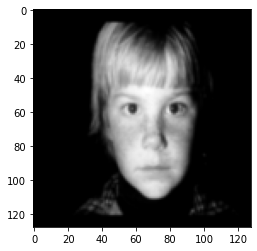

In [2]:
# 查看单个图片信息
f = open(r'C:\Users\yy\Desktop\face\rawdata\1224','rb')  
x = np.fromfile(f,dtype=np.ubyte)
x = x.reshape(128,-1)
print(x.shape)
plt.imshow(x,cmap=plt.cm.gray)
plt.show()
f.close()

(128, 128)


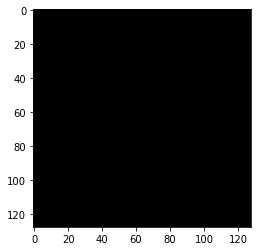

In [3]:
f = open(r'C:\Users\yy\Desktop\face\有问题的数据\2099','rb')  
x = np.fromfile(f,dtype=np.ubyte)
x = x.reshape(128,-1)
print(x.shape)
plt.imshow(x,cmap=plt.cm.gray)
plt.show()
f.close()

In [4]:
# 源数据处理
all_file = os.listdir(r'C:\Users\yy\Desktop\face\rawdata')
# 读取所有data_x数据,  删除有问题的数据
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))
# 将两个数据标签整理再一起
f = open('C:/Users/yy/Desktop/face/faceDR','r')
r1 = f.readlines()
f.close()
f = open('C:/Users/yy/Desktop/face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

In [5]:
# 整理出data_x,和data_y
man = 0
woman = 0
all_file = os.listdir('C:/Users/yy/Desktop/face/rawdata')
for i in range(len(all_file)):
    with open('C:/Users/yy/Desktop/face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        x = x.reshape(128,-1)
        data_x[i] = x
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                    woman = woman+1
                elif 'male' in j:
                    data_y[i] = 1
                    man = man+1
                else:
                    data_y[i] = None
                break
face_data=data_x.reshape(data_x.shape[0],-1)
face_target = data_y
#print(face_data.shape)
print("number of man is %s,number of woman is %s"%(man,woman))
X = face_data
y = face_target

number of man is 2417,number of woman is 1566


## 2.查看整理后的数据和标签，确定为二分类问题，采用SVC

In [6]:
X.shape

(3983, 16384)

In [7]:
np.unique(y)

array([0., 1.])

In [8]:
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,3983.0,0.010043,0.207590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.0
3,3983.0,0.307557,3.489103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,84.0
4,3983.0,0.795631,7.802234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.18,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16380,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16381,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16382,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


## 3.PCA降维，查看降维后的数据，并对数据进行标准化

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
print("Ytrain:")
valuec = pd.Series(Ytrain).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())
print("Ytest:")
valuec = pd.Series(Ytest).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())

Ytrain:
1.0    1671
0.0    1117
dtype: int64
0.40064562410329985
Ytest:
1.0    746
0.0    449
dtype: int64
0.3757322175732218


In [9]:
#pca = PCA(n_components=76, svd_solver='randomized',whiten=True).fit(X)
pca = PCA(n_components=0.95).fit(X)
x_dr = pca.transform(X)
print(x_dr.shape)
X_1 = x_dr

(3983, 178)


In [ ]:
pca = PCA(svd_solver='randomized',n_components=76, whiten=True).fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)  
Xtest_pca = pca.transform(Xtest)  

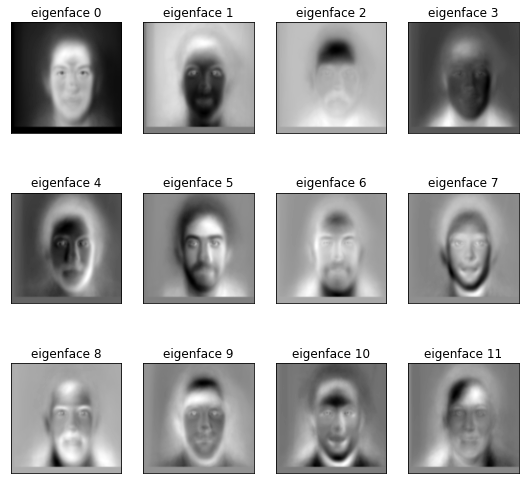

In [10]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((178, 128, 128))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 128, 128)

plt.show()

In [51]:
data = pd.DataFrame(X_1)
data.describe([0.01,0.1,0.3,0.6,0.9,0.99]).T

,count,mean,std,min,1%,10%,30%,50%,60%,90%,99%,max
0,3983.0,-1.193241e-13,2688.746361,-6714.727125,-5507.926714,-3332.978450,-1460.022822,6.394695,706.649925,3209.777668,6980.504710,16771.751202
1,3983.0,-2.170054e-13,1467.360731,-3626.052216,-2448.129003,-1462.504711,-709.368472,-192.432578,123.044468,1329.762081,4392.236972,17177.238662
2,3983.0,-5.263332e-14,1364.845763,-4933.961910,-2739.453395,-1575.364247,-780.783277,-101.066619,178.750275,1762.715601,3578.235153,9285.613532
3,3983.0,-7.883581e-14,988.764143,-4317.029395,-2287.745234,-1105.646696,-486.463888,-77.236533,126.124647,1237.340754,2876.651096,4730.791887
4,3983.0,-1.074573e-13,943.902610,-4989.959887,-2092.063416,-1041.154667,-423.044975,-41.808227,124.123728,1075.580907,3198.698437,5244.974527
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,1.366274e-15,77.824523,-363.913666,-198.114962,-91.961485,-37.029120,-2.117024,16.831930,94.353383,201.485486,499.985130
174,3983.0,5.398198e-15,77.489079,-338.750453,-194.923714,-93.057455,-35.845503,-1.041492,16.021562,93.849466,200.267043,386.544268
175,3983.0,2.184433e-15,76.933503,-289.168233,-196.379307,-94.135460,-34.044384,0.956367,15.752523,87.818021,198.401217,684.320739
176,3983.0,5.622974e-15,76.544570,-351.067714,-192.361949,-88.688734,-34.111166,-1.443319,15.325849,89.647900,200.416974,673.699818


In [11]:
X_2 = StandardScaler().fit_transform(X_1)
data = pd.DataFrame(X_2)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,-3.331645e-17,1.000126,-2.497659,-2.048768,-1.701707,-1.239759,-0.675909,0.002379,0.645476,1.193932,2.596519,6.238542
1,3983.0,3.374710e-16,1.000126,-2.471449,-1.668599,-1.223393,-0.996816,-0.577625,-0.131158,0.475502,0.906341,2.993666,11.707684
2,3983.0,1.159909e-16,1.000126,-3.615486,-2.007404,-1.433535,-1.154388,-0.696121,-0.074059,0.619293,1.291675,2.622043,6.804270
3,3983.0,-1.536696e-16,1.000126,-4.366634,-2.314033,-1.429826,-1.118351,-0.604710,-0.078124,0.526015,1.251558,2.909705,4.785151
4,3983.0,5.082134e-17,1.000126,-5.287184,-2.216676,-1.410238,-1.103170,-0.570927,-0.044299,0.442323,1.139647,3.389227,5.557388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,-2.581833e-17,1.000126,-4.676667,-2.545982,-1.567964,-1.181800,-0.606436,-0.027206,0.600521,1.212538,2.589297,6.425326
174,3983.0,-1.114962e-17,1.000126,-4.372138,-2.515815,-1.642933,-1.201061,-0.600082,-0.013442,0.584622,1.211284,2.584780,4.988997
175,3983.0,2.585317e-17,1.000126,-3.759150,-2.552906,-1.619534,-1.223749,-0.573894,0.012433,0.594034,1.141623,2.579190,8.896081
176,3983.0,-3.261263e-17,1.000126,-4.587024,-2.513387,-1.586332,-1.158800,-0.573152,-0.018858,0.568122,1.171333,2.618633,8.802511


# 建立模型和初步调参

## 1.对未标准化数据进行训练

In [16]:
Xtrain_1, Xtest_1, Ytrain_1, Ytest_1 = train_test_split(X_1,y,test_size=0.3,random_state=420)
tr_man_1 = 0
tr_woman_1 = 0
#训练集是否均衡
for i in range(len(Ytrain_1)):
    if Ytrain_1[i] == 1.0:
        tr_man_1 = tr_man_1+1
    if Ytrain_1[i] == 0.0:
        tr_woman_1 = tr_woman_1+1
rate_1 = tr_man_1/tr_woman_1
print("man:%s"%tr_man_1)
print("woman:%s"%tr_woman_1)
print("rate:%f"%rate_1)

man:1671
woman:1117
rate:1.495971


In [17]:
Kernel = ["rbf","sigmoid","poly","linear"]
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel = kernel
              , gamma = "auto"
              #, degree = 1
              , cache_size = 5000
             ).fit(Xtrain_1,Ytrain_1)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest_1,Ytest_1)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

KeyboardInterrupt: 

## 2.对标准化后数据进行训练

In [12]:
Xtrain_2, Xtest_2, Ytrain_2, Ytest_2 = train_test_split(X_2,y,test_size=0.3,random_state=420)
tr_man_2 = 0
tr_woman_2 = 0
#训练集是否均衡
for i in range(len(Ytrain_2)):
    if Ytrain_2[i] == 1.0:
        tr_man_2 = tr_man_2+1
    if Ytrain_2[i] == 0.0:
        tr_woman_2 = tr_woman_2+1
rate_2 = tr_man_2/tr_woman_2
print("man:%s"%tr_man_2)
print("woman:%s"%tr_woman_2)
print("rate:%f"%rate_2)

man:1671
woman:1117
rate:1.495971


In [12]:
Kernel = ["rbf","sigmoid","poly","linear"]
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel = kernel
              , gamma = "auto"
              , degree = 1
              , cache_size = 5000
             ).fit(Xtrain_2,Ytrain_2)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest_2,Ytest_2)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel rbf is 0.857741
00:01:927412
The accuracy under kernel sigmoid is 0.800837
00:00:935012
The accuracy under kernel poly is 0.820084
00:01:078640
The accuracy under kernel linear is 0.817573
01:21:807951


In [9]:
from scipy.spatial.distance import pdist, squareform#pdist 计算成对距离，squareform 转换为方阵形式
from scipy import exp
from scipy.linalg import eigh #Return the eigenvalues and eigenvectors of a Hermitian or symmetric matrix.(by ascending)
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return
    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   
    """
    #计算M*N矩阵中两两向量的平方欧几里得距离
    sq_dists = pdist(X, 'sqeuclidean')
    
    #将距离转换为方阵
    mat_sq_dists = squareform(sq_dists)
    
    #计算对称kernel 矩阵
    K = exp(- gamma * mat_sq_dists)
    
    # Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
 
    #提取 K  的向量和特征值
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs [::-1]
 
    #选择top K 向量
    X_pc = np.column_stack(eigenvecs[:,i]
                          for i in range(n_components))
    
    
    return X_pc

## 3.选定rbf为核函数，初步调参C&Gamma

0.8602510460251046 0.00504273124198205


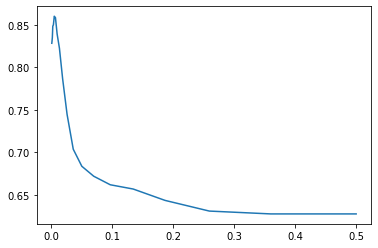

In [15]:
score = []
gamma_range = np.logspace(-10,-1,20,base=2)
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain_2,Ytrain_2)
    score.append(clf.score(Xtest_2,Ytest_2))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

0.8610878661087866 0.0051860930695143284


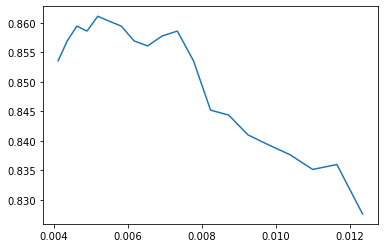

In [21]:
score = []
gamma_range = np.logspace(-5,-4,20,base=3)
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain_2,Ytrain_2)
    score.append(clf.score(Xtest_2,Ytest_2))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

0.8677824267782427 2.6389473684210527


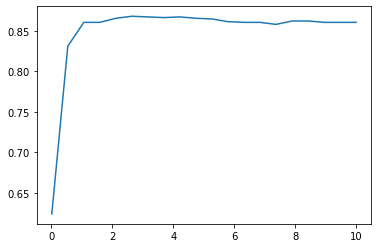

In [16]:
score = []
C_range = np.linspace(0.01,10,20)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.0051860930695143284,cache_size=5000).fit(Xtrain_2,Ytrain_2)
    score.append(clf.score(Xtest_2,Ytest_2))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.8686192468619247 2.7994736842105263


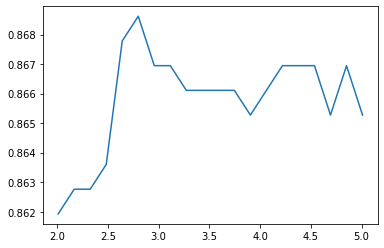

In [17]:
score = []
C_range = np.linspace(2.01,5.01,20)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.0051860930695143284,cache_size=5000).fit(Xtrain_2,Ytrain_2)
    score.append(clf.score(Xtest_2,Ytest_2))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [19]:
clf = SVC(kernel="rbf",C=2.7994736842105263,gamma = 0.0051860930695143284,cache_size=5000).fit(Xtrain_2,Ytrain_2)
print(clf.score(Xtest_2,Ytest_2))

0.8686192468619247


# 分类器性能评价和调参

## 10折交叉验证

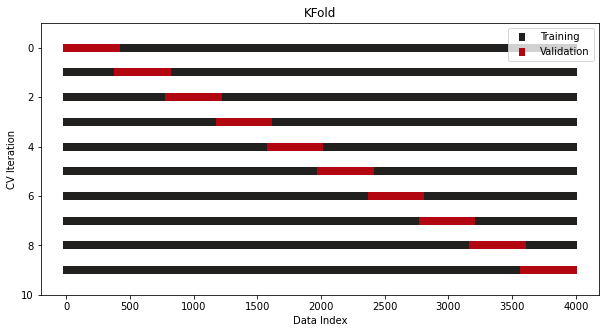

[0.52631579 0.78446115 0.82205514 0.87437186 0.7839196  0.76884422
 0.77135678 0.89949749 0.68592965 0.81407035]
The average score is 0.773082


In [27]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_cv(cv, X, y): 
    fig, ax = plt.subplots(figsize=(10, 5)) 
 
    for ii, (tr, tt) in enumerate(cv.split(X, y)): 
        p1 = ax.scatter(tr, [ii] * len(tr), c="#221f1f", marker="_", lw=8) 
        p2 = ax.scatter(tt, [ii] * len(tt), c="#b20710", marker="_", lw=8) 
        ax.set( 
            title=cv.__class__.__name__, 
            xlabel="Data Index", 
            ylabel="CV Iteration", 
            ylim=[cv.n_splits, -1], 
        ) 
        ax.legend([p1, p2], ["Training", "Validation"]) 
 
    plt.show()

from sklearn.model_selection import KFold  
cv = KFold(n_splits=10) 
visualize_cv(cv, X_2, y)
scores = cross_val_score(SVC(C=3.070204081632653,kernel='rbf',gamma=0.0051860930695143284), X_2, y, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

In [28]:
Kernel = ["rbf","sigmoid","poly","linear"]
for kernel in Kernel:
    scores = cross_val_score(SVC(kernel=kernel,gamma="auto",degree = 1,cache_size=5000), X_2, y, cv=10)
    print(scores)
    average = 0
    for i in range(len(scores)):
        average = average + scores[i]
    print("The %s's average score is %f"%(kernel,average/len(scores)))

[0.55639098 0.78947368 0.80701754 0.86180905 0.78894472 0.74623116
 0.78140704 0.86432161 0.6959799  0.7839196 ]
The rbf's average score is 0.767550
[0.49122807 0.74686717 0.78446115 0.83165829 0.77889447 0.75376884
 0.75879397 0.7839196  0.64824121 0.81155779]
The sigmoid's average score is 0.738939
[0.50877193 0.76691729 0.80451128 0.83919598 0.78894472 0.75628141
 0.79396985 0.80150754 0.67839196 0.77638191]
The poly's average score is 0.751487
[0.5037594  0.77443609 0.80451128 0.87437186 0.75879397 0.7638191
 0.81909548 0.8040201  0.63316583 0.81407035]
The linear's average score is 0.755004


In [29]:
scores = cross_val_score(SVC(C=3.070204081632653,kernel='rbf',gamma=0.0051860930695143284,class_weight={1:1.5}), X_2, y, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

[0.54636591 0.78195489 0.81704261 0.86432161 0.77889447 0.77638191
 0.76130653 0.88442211 0.67085427 0.8040201 ]
The average score is 0.768556


In [21]:
scores = cross_val_score(SVC(C=2.7994736842105263,kernel='rbf',gamma=0.0051860930695143284), X_2, y, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

[0.52882206 0.78947368 0.81954887 0.87688442 0.7839196  0.76884422
 0.76633166 0.89447236 0.68844221 0.81155779]
The average score is 0.772830


In [40]:
scores = cross_val_score(SVC(C=2.672222,kernel='rbf',gamma=0.005935), X_2, y, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

[0.52882206 0.78446115 0.81453634 0.86934673 0.78643216 0.7638191
 0.77135678 0.89949749 0.67336683 0.81155779]
The average score is 0.770320


## 调参从而追求不同性能

### （1）追求recall

In [25]:
times = time()
clf = SVC(kernel="rbf",gamma ="auto",cache_size=5000,class_weight='balanced').fit(Xtrain_2,Ytrain_2)
result = clf.predict(Xtest_2)
score = clf.score(Xtest_2,Ytest_2)
recall = recall_score(Ytest_2, result)
auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
print("rbf 's testing accuracy %f, recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

rbf 's testing accuracy 0.862762, recall is 0.890080', auc is 0.932919
00:03:037118


In [33]:
times = time()
clf = SVC(kernel="rbf",gamma ="auto",cache_size=5000,class_weight={1:1.5}).fit(Xtrain_2,Ytrain_2)
result = clf.predict(Xtest_2)
score = clf.score(Xtest_2,Ytest_2)
recall = recall_score(Ytest_2, result)
auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
print("rbf 's testing accuracy %f, recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

rbf 's testing accuracy 0.855230, recall is 0.945040', auc is 0.931609
00:03:240332


In [23]:
from sklearn.metrics import roc_auc_score,recall_score
times = time()
clf = SVC(kernel="rbf",C=2.7994736842105263,gamma = 0.0051860930695143284,cache_size=5000,class_weight="balanced").fit(Xtrain_2,Ytrain_2)
result = clf.predict(Xtest_2)
score = clf.score(Xtest_2,Ytest_2)
recall = recall_score(Ytest_2, result)
auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
print("rbf 's testing accuracy %f, recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

rbf 's testing accuracy 0.865272, recall is 0.904826', auc is 0.935534
00:03:672264


In [34]:
times = time()
clf = SVC(kernel="rbf",C=3.070204081632653,gamma = 0.018255687306754344,cache_size=5000,class_weight={1:1.5}).fit(Xtrain_2,Ytrain_2)
result = clf.predict(Xtest_2)
score = clf.score(Xtest_2,Ytest_2)
recall = recall_score(Ytest_2, result)
auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
print("rbf 's testing accuracy %f, recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

rbf 's testing accuracy 0.865272, recall is 0.918231', auc is 0.935854
00:03:299177


### （2）追求accuracy

In [26]:
valuec = pd.Series(Ytest_2).value_counts()
print(valuec)
valuec[1]/valuec.sum()

1.0    746
0.0    449
dtype: int64


0.6242677824267783

In [27]:
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "rbf"
          ,gamma="auto"
          ,cache_size = 5000
         ).fit(Xtrain_2, Ytrain_2)
result = clf.predict(Xtest_2)
cm = CM(Ytest_2,result,labels=(1,0))
print(cm)
specificity = cm[0,0]/cm[0,:].sum()
specificity #几乎所有的1都被判断正确了，还有不少0也被判断正确了

[[686  60]
 [110 339]]


0.9195710455764075

In [39]:
clf = SVC(kernel="rbf",
          C=3.070204081632653,
          gamma = 0.018255687306754344,
          cache_size=5000).fit(Xtrain_2,Ytrain_2)
result = clf.predict(Xtest_2)
cm = CM(Ytest_2,result,labels=(1,0))
print(cm)
specificity = cm[1,1]/cm[1,:].sum()
specificity

[[716  30]
 [199 250]]


0.5567928730512249

In [34]:
irange = np.linspace(1.064444,1.118889,5)
for i in irange:
    times = time()
    clf = SVC(kernel = "rbf"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:i}
             ).fit(Xtrain_2, Ytrain_2)
    result = clf.predict(Xtest_2)
    score = clf.score(Xtest_2,Ytest_2)
    recall = recall_score(Ytest_2, result)
    auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.064444 testing accuracy 0.863598, recall is 0.930295', auc is 0.931182
00:02:902232
under ratio 1:1.078055 testing accuracy 0.862762, recall is 0.930295', auc is 0.931208
00:02:956091
under ratio 1:1.091667 testing accuracy 0.863598, recall is 0.931635', auc is 0.931223
00:02:825497
under ratio 1:1.105278 testing accuracy 0.863598, recall is 0.931635', auc is 0.931253
00:02:689804
under ratio 1:1.118889 testing accuracy 0.863598, recall is 0.931635', auc is 0.931220
00:02:733721


### （3）追求平衡

under C 0.010000, testing accuracy is 0.624268,recall is 1.000000', auc is 0.874989
00:03:034879
under C 0.675556, testing accuracy is 0.834310,recall is 0.941019', auc is 0.925521
00:02:422564
under C 1.341111, testing accuracy is 0.866946,recall is 0.926273', auc is 0.934648
00:03:266259
under C 2.006667, testing accuracy is 0.867782,recall is 0.920912', auc is 0.937326
00:03:172514
under C 2.672222, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938353
00:03:095739
under C 3.337778, testing accuracy is 0.865272,recall is 0.912869', auc is 0.938409
00:03:160520
under C 4.003333, testing accuracy is 0.863598,recall is 0.911528', auc is 0.938386
00:03:450817
under C 4.668889, testing accuracy is 0.861925,recall is 0.911528', auc is 0.938123
00:03:323107
under C 5.334444, testing accuracy is 0.862762,recall is 0.910188', auc is 0.937654
00:03:393920
under C 6.000000, testing accuracy is 0.861925,recall is 0.910188', auc is 0.937508
00:03:502628
0.9384094532383551 3.337777777

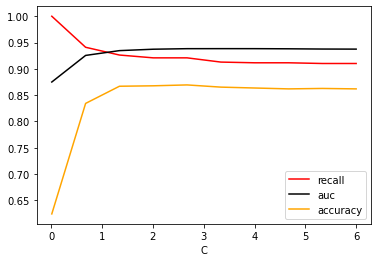

"\nunder C 2.672222, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938353\n00:03:105691\n"

In [37]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,6,10)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "rbf",C=C,cache_size = 5000
              ,class_weight = {1:1.118889}
             ).fit(Xtrain_2, Ytrain_2)
    result = clf.predict(Xtest_2)
    score = clf.score(Xtest_2,Ytest_2)
    recall = recall_score(Ytest_2, result)
    auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.xlabel('C')
plt.legend()
plt.show()
'''
under C 2.672222, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938353
00:03:105691
'''

under gamma 0.004115, testing accuracy is 0.860251,recall is 0.902145', auc is 0.936275
00:03:432846
under gamma 0.004650, testing accuracy is 0.865272,recall is 0.911528', auc is 0.937218
00:03:620282
under gamma 0.005253, testing accuracy is 0.868619,recall is 0.918231', auc is 0.938233
00:03:950433
under gamma 0.005935, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938574
00:03:553582
under gamma 0.006706, testing accuracy is 0.860251,recall is 0.922252', auc is 0.938186
00:03:473707
under gamma 0.007576, testing accuracy is 0.859414,recall is 0.928954', auc is 0.937400
00:03:883189
under gamma 0.008560, testing accuracy is 0.856904,recall is 0.935657', auc is 0.936239
00:03:541558
under gamma 0.009671, testing accuracy is 0.852720,recall is 0.938338', auc is 0.934636
00:03:745006
under gamma 0.010927, testing accuracy is 0.845188,recall is 0.943700', auc is 0.932698
00:03:683144
under gamma 0.012346, testing accuracy is 0.840167,recall is 0.950402', auc is 0.930220
00:

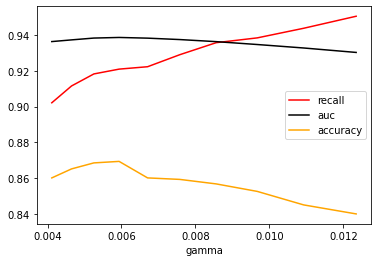

"\nunder gamma 0.005935, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938574\n00:03:145588\n"

In [38]:
import matplotlib.pyplot as plt
gamma_range = np.logspace(-5,-4,10,base=3)
recallall = []
aucall = []
scoreall = []
for gamma in gamma_range:
    times = time()
    clf = SVC(kernel = "rbf",C= 2.672222,gamma = gamma,cache_size = 5000
              ,class_weight = {1:1.118889}
             ).fit(Xtrain_2, Ytrain_2)
    result = clf.predict(Xtest_2)
    score = clf.score(Xtest_2,Ytest_2)
    recall = recall_score(Ytest_2, result)
    auc = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under gamma %f, testing accuracy is %f,recall is %f', auc is %f" % (gamma,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(gamma_range,recallall,c="red",label="recall")
plt.plot(gamma_range,aucall,c="black",label="auc")
plt.plot(gamma_range,scoreall,c="orange",label="accuracy")
plt.xlabel('gamma')
plt.legend()
plt.show()
'''
under gamma 0.005935, testing accuracy is 0.869456,recall is 0.920912', auc is 0.938574
00:03:145588
'''

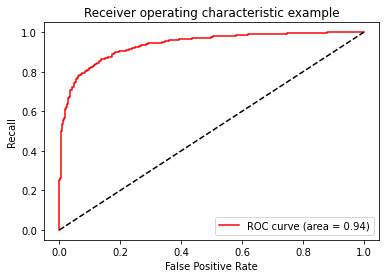

In [43]:
from sklearn.metrics import roc_curve as ROC
FPR,Recall,thresholds = ROC(Ytest_2,clf.decision_function(Xtest_2),pos_label=1)
area = roc_auc_score(Ytest_2,clf.decision_function(Xtest_2))
plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

0.14434431683109344

In [45]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "rbf",C=5.58,cache_size = 5000,class_weight = {1:1.527778}).fit(Xtrain_2, Ytrain_2)
prob = pd.DataFrame(clf.decision_function(Xtest_2))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
prob.loc[:,"y_pred"].isnull().sum()
#检查模型本身的准确度
score = AC(Ytest_2,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest_2, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.858577,recall is 0.856568
00:03:505431


# kpca combine with svm

In [8]:
'''
refer to "GENDER CLASSIFICATION USING KPCA AND SVM"
kpca将图像的维数从128X128降至76
'''
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=178, kernel='poly',degree=2)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(3983, 178)

In [9]:
X_3 = StandardScaler().fit_transform(X_transformed)
data = pd.DataFrame(X_3)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,3.355555e-17,1.000126,-1.052728,-1.021042,-0.961513,-0.830491,-0.583868,-0.168857,0.364644,0.909347,2.797581,16.965324
1,3983.0,1.283600e-17,1.000126,-3.406684,-2.107699,-1.368130,-1.046739,-0.516241,0.065251,0.534700,0.847158,1.323695,17.065499
2,3983.0,2.411383e-16,1.000126,-5.844207,-2.852494,-1.483897,-0.943504,-0.544229,-0.060295,0.564523,1.222390,2.501348,6.056833
3,3983.0,2.362325e-18,1.000126,-9.401335,-2.724556,-1.344021,-0.883197,-0.399109,-0.066852,0.424478,1.167783,2.278649,10.800722
4,3983.0,-1.631468e-16,1.000126,-5.338586,-3.318657,-1.733245,-1.104929,-0.377646,0.081992,0.488590,1.010239,2.318314,5.899438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,-4.267516e-17,1.000126,-5.814054,-2.803882,-1.559677,-1.080301,-0.456857,-0.001483,0.438265,1.058767,2.963476,6.314092
174,3983.0,-1.917734e-17,1.000126,-7.357334,-2.937694,-1.489328,-0.998551,-0.443919,0.031800,0.407592,0.989834,2.905912,8.627147
175,3983.0,-2.809703e-17,1.000126,-7.874247,-3.042242,-1.485535,-0.988700,-0.407197,-0.024005,0.419918,0.985167,3.035637,10.099437
176,3983.0,-4.167169e-18,1.000126,-6.089422,-2.928745,-1.511665,-1.074058,-0.453056,-0.016525,0.437092,1.067804,2.867589,7.549227


[(3.015, 0.010825, 0.6849111665143749), (3.015, 0.010829, 0.6851621705304392), (3.015, 0.010833, 0.6851621705304392), (3.015, 0.010837, 0.6851621705304392), (3.015, 0.010841, 0.6851621705304392), (3.015, 0.010845, 0.6851621705304392), (3.015, 0.010849, 0.6851621705304392), (3.015, 0.010853, 0.6849111665143749), (3.015, 0.010857, 0.6846601624983106), (3.015, 0.010861, 0.6844091584822465), (3.016, 0.010825, 0.6851621705304392), (3.016, 0.010829, 0.6849111665143749), (3.016, 0.010833, 0.6851621705304392), (3.016, 0.010837, 0.6851621705304392), (3.016, 0.010841, 0.6851621705304392), (3.016, 0.010845, 0.6851621705304392), (3.016, 0.010849, 0.6849111665143749), (3.016, 0.010853, 0.6849111665143749), (3.016, 0.010857, 0.6846601624983106), (3.016, 0.010861, 0.6841580283968622), (3.017, 0.010825, 0.6851621705304392), (3.017, 0.010829, 0.6851621705304392), (3.017, 0.010833, 0.6851621705304392), (3.017, 0.010837, 0.6851621705304392), (3.017, 0.010841, 0.6851621705304392), (3.017, 0.010845, 0.6851

<IPython.core.display.Javascript object>


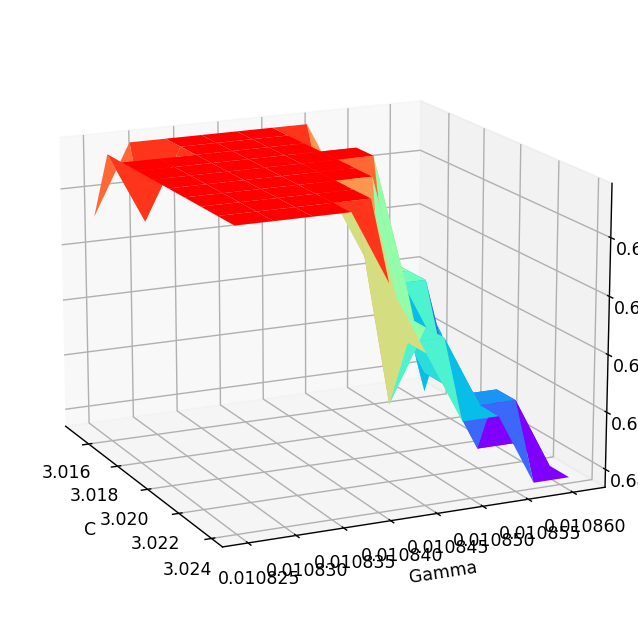

In [19]:
'''
1.利用幂次为2的多项式核将数据从原始空间映射到特征空间
2.利用2倍交叉验证来学习最优参数，即C和ϒ
3.构造的特征向量作为输入给SVMrbf核，该核将图像分为男性和女性
'''
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
%matplotlib notebook
A = []
B = []
D = []
M = []
for C in range(3015,3025,1):
    for gamma in range(10825,10865,4):
        accuracy = cross_val_score(SVC(C=C/1000,kernel='rbf',gamma=gamma/1000000),X_3,y,cv=2)
        A.append(C/1000)
        B.append(gamma/1000000)
        D.append((accuracy[0]+accuracy[1])/2)
        M.append((C/1000,gamma/1000000,(accuracy[0]+accuracy[1])/2))
print(M)
A = np.array(A).reshape(10,10)
B = np.array(B).reshape(10,10)
D = np.array(D).reshape(10,10)
fig = plt.figure()
#ax = Axes3D(fig)
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(A,B,D,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('gamma_C_auc')
plt.show()

[(0.01, 0.00411522633744856, 0.6068289985658355), (0.01, 0.004649510139546307, 0.6068289985658355), (0.01, 0.005253160522671777, 0.6068289985658355), (0.01, 0.005935183416902913, 0.6068289985658355), (0.01, 0.006705754000900604, 0.6068289985658355), (0.01, 0.007576368506579208, 0.6068289985658355), (0.01, 0.008560015732723887, 0.6068289985658355), (0.01, 0.009671370826386078, 0.6068289985658355), (0.01, 0.010927014223104452, 0.6068289985658355), (0.01, 0.012345679012345678, 0.6068289985658355), (0.5644444444444445, 0.00411522633744856, 0.6733599390026203), (0.5644444444444445, 0.004649510139546307, 0.6758698530939429), (0.5644444444444445, 0.005253160522671777, 0.6763718611260714), (0.5644444444444445, 0.005935183416902913, 0.6763716089874314), (0.5644444444444445, 0.006705754000900604, 0.6728554095840923), (0.5644444444444445, 0.007576368506579208, 0.6733572915469008), (0.5644444444444445, 0.008560015732723887, 0.6731052789762768), (0.5644444444444445, 0.009671370826386078, 0.66682942

<IPython.core.display.Javascript object>


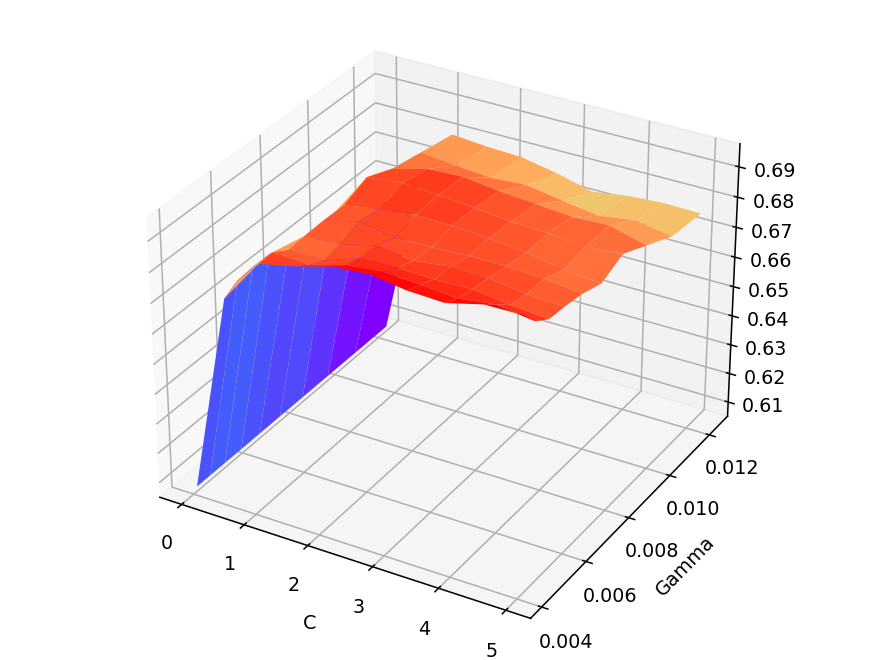

In [25]:
'''
1.利用幂次为2的多项式核将数据从原始空间映射到特征空间
2.利用2倍交叉验证来学习最优参数，即C和ϒ
3.构造的特征向量作为输入给SVMrbf核，该核将图像分为男性和女性
'''
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
%matplotlib notebook
A = []
B = []
D = []
M = []
for C in np.linspace(0.01,5,10):
    for gamma in np.logspace(-5,-4,10,base=3):
        accuracy = cross_val_score(SVC(C=C,kernel='rbf',gamma=gamma),X_3,y,cv=2)
        A.append(C)
        B.append(gamma)
        D.append((accuracy[0]+accuracy[1])/2)
        M.append((C,gamma,(accuracy[0]+accuracy[1])/2))
print(M)
A = np.array(A).reshape(10,10)
B = np.array(B).reshape(10,10)
D = np.array(D).reshape(10,10)
fig = plt.figure()
#ax = Axes3D(fig)
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(A,B,D,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('gamma_C_auc')
plt.show()

[(3.01, 0.0013717421124828531, 0.6891808822431867), (3.01, 0.0015498367131821023, 0.6901848983074437), (3.01, 0.001751053507557259, 0.6894311298433311), (3.01, 0.001978394472300971, 0.6921926782973178), (3.01, 0.0022352513336335346, 0.6936993327403033), (3.01, 0.0025254561688597362, 0.6957083734233771), (3.01, 0.002853338577574629, 0.6974654015358268), (3.01, 0.003223790275462026, 0.6969628892264185), (3.01, 0.0036423380743681507, 0.6962091207623058), (3.01, 0.00411522633744856, 0.6936983241857435), (3.5644444444444443, 0.0013717421124828531, 0.689431760189931), (3.5644444444444443, 0.0015498367131821023, 0.6924439344520221), (3.5644444444444443, 0.001751053507557259, 0.6929460685534705), (3.5644444444444443, 0.001978394472300971, 0.694452596927136), (3.5644444444444443, 0.0022352513336335346, 0.6972145235890826), (3.5644444444444443, 0.0025254561688597362, 0.6982190439306195), (3.5644444444444443, 0.002853338577574629, 0.6989712995628925), (3.5644444444444443, 0.003223790275462026, 0.

<IPython.core.display.Javascript object>


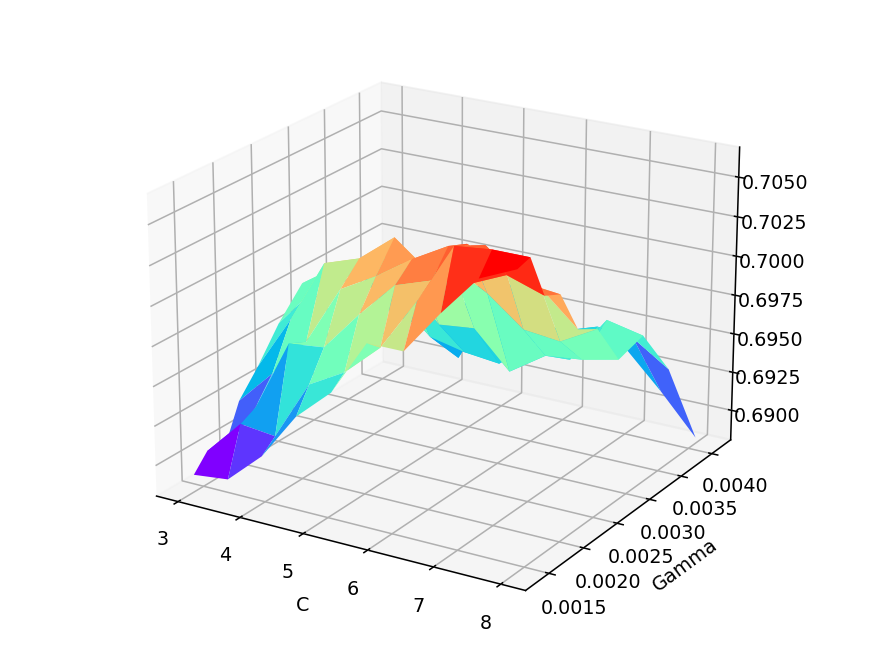

(8.0, 0.0015498367131821023, 0.7065052021244194)

In [28]:
'''
根据上图调节C和gamma的区间
得到最优C和gamma
'''
%matplotlib notebook
A = []
B = []
D = []
M1 = []
for C in np.linspace(5.01,10,10):
    for gamma in np.logspace(-6,-5,10,base=3):
        accuracy = cross_val_score(SVC(C=C,kernel='rbf',gamma=gamma),X_3,y,cv=2)
        A.append(C)
        B.append(gamma)
        D.append((accuracy[0]+accuracy[1])/2)
        M1.append((C,gamma,(accuracy[0]+accuracy[1])/2))
print(M1)
A = np.array(A).reshape(10,10)
B = np.array(B).reshape(10,10)
D = np.array(D).reshape(10,10)
fig = plt.figure()
#ax = Axes3D(fig)
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(A,B,D,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('gamma_C_auc')
plt.show()
L_ac=[]
for i in range(0,100,1):
    L_ac.append(M1[i][2])
maxid = L_ac.index(max(L_ac))
M1[maxid]

[(5.01, 0.0009765625, 0.6894325166058508), (5.01, 0.0011391885152110507, 0.691691552750429), (5.01, 0.0013288964845452902, 0.6959596295780812), (5.01, 0.0015501963398126943, 0.6962105075248256), (5.01, 0.0018083490474361146, 0.7004789625604376), (5.01, 0.002109491677524035, 0.7017338565714389), (5.01, 0.002460783300575925, 0.7012315964006706), (5.01, 0.0028705751802257785, 0.6989711734935724), (5.01, 0.0033486093080198178, 0.693196442222935), (5.01, 0.00390625, 0.6959576124689617), (5.564444444444444, 0.0009765625, 0.6936997109482632), (5.564444444444444, 0.0011391885152110507, 0.6952067435992084), (5.564444444444444, 0.0013288964845452902, 0.698721304101388), (5.564444444444444, 0.0015501963398126943, 0.6987216823093478), (5.564444444444444, 0.0018083490474361146, 0.7012318485393104), (5.564444444444444, 0.002109491677524035, 0.7032403849451043), (5.564444444444444, 0.002460783300575925, 0.7024866164809918), (5.564444444444444, 0.0028705751802257785, 0.6949541006819846), (5.5644444444

<IPython.core.display.Javascript object>


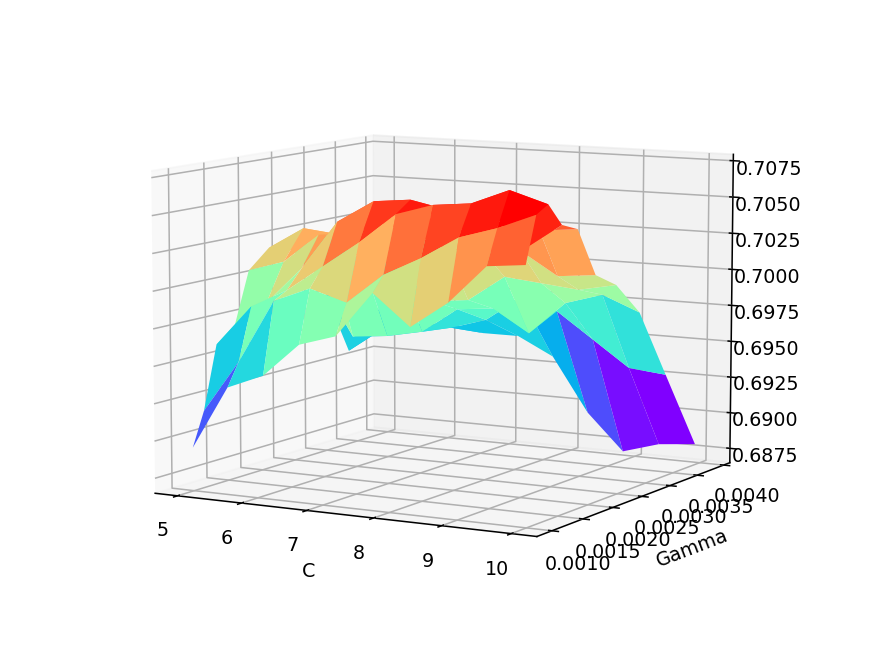

(9.445555555555556, 0.0013288964845452902, 0.7075093442579963)

In [29]:
'''
根据上图调节C和gamma的区间
得到最优C和gamma
'''
%matplotlib notebook
A = []
B = []
D = []
M2 = []
for C in np.linspace(5.01,10,10):
    for gamma in np.logspace(-5,-4,10,base=4):
        accuracy = cross_val_score(SVC(C=C,kernel='rbf',gamma=gamma),X_3,y,cv=2)
        A.append(C)
        B.append(gamma)
        D.append((accuracy[0]+accuracy[1])/2)
        M2.append((C,gamma,(accuracy[0]+accuracy[1])/2))
print(M2)
A = np.array(A).reshape(10,10)
B = np.array(B).reshape(10,10)
D = np.array(D).reshape(10,10)
fig = plt.figure()
#ax = Axes3D(fig)
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(A,B,D,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('gamma_C_auc')
plt.show()
L_ac=[]
for i in range(0,100,1):
    L_ac.append(M2[i][2])
maxid = L_ac.index(max(L_ac))
M2[maxid]

In [30]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_3,y,test_size=0.3,random_state=420)
Kernel = ["rbf"]
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel="rbf",C=9.445555555555556,gamma = 0.0013288964845452902,cache_size=5000).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel rbf is 0.832636
00:01:661331


In [31]:
scores = cross_val_score(SVC(C=9.445555555555556,kernel='rbf',gamma=0.0013288964845452902,cache_size=5000,class_weight = {1:1.527778}), X_3, y, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

[0.59398496 0.70927318 0.80952381 0.84422111 0.77889447 0.83668342
 0.76884422 0.55025126 0.69849246 0.81155779]
The average score is 0.740173
